# CW 

# Q1(a) 
Read in the csv file to create a dataframe. Remove the columns named unique id, saon, paon, street, locality, district and county. Further, remove all the rows which have ’O’ in the property type column. In the new build column, convert all of the ’Y’s to 1 and all of the ’N’s to 0. In the estate type column, convert all of the ’F’s to 1 and all of the ’L’s to 0. In the transaction category column, convert all of the ’A’s to 1 and all of the ’B’s to 0. Remove all of the rows which don’t have a postcode. Now make a copy of the postcode column and name it ’PC’. ’PC’ represents a simplified numerical postcode. Now for each element in ’PC’ remove all the letters and spaces to yield a 3 digit number. (7 marks)

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Prices.csv')   

In [3]:
print(df.shape) 
print(df.columns) 

(370974, 14)
Index(['unique_id', 'price_paid', 'deed_date', 'postcode', 'property_type',
       'new_build', 'estate_type', 'saon', 'paon', 'street', 'locality',
       'district', 'county', 'transaction_category'],
      dtype='object')


In [4]:
df2 = df.drop(columns=['unique_id','saon','paon','street','locality','district','county'])  

In [5]:
print(df2.columns)

Index(['price_paid', 'deed_date', 'postcode', 'property_type', 'new_build',
       'estate_type', 'transaction_category'],
      dtype='object')


In [6]:
df2.drop( df2[df2["property_type"] == "O"].index, inplace = True)                    

In [7]:
print(df2.shape) 
print(df2.columns) 

(366826, 7)
Index(['price_paid', 'deed_date', 'postcode', 'property_type', 'new_build',
       'estate_type', 'transaction_category'],
      dtype='object')


In [8]:
condition1 = df2["new_build"] == "Y"
df2.loc[condition1,"new_build"] = 1
condition2 = df2["new_build"] == "N"
df2.loc[condition2,"new_build"] = 0
condition3 = df2["estate_type"] == "F"
df2.loc[condition3,"estate_type"] = 1
condition4 = df2["estate_type"] == "L"
df2.loc[condition4,"estate_type"] = 0
condition5 = df2["transaction_category"] == "A"
df2.loc[condition5,"transaction_category"] = 1
condition6 = df2["transaction_category"] == "B"
df2.loc[condition6,"transaction_category"] = 0                                                          

In [9]:
print(df2.shape) 
print(df2.columns) 

(366826, 7)
Index(['price_paid', 'deed_date', 'postcode', 'property_type', 'new_build',
       'estate_type', 'transaction_category'],
      dtype='object')


In [10]:
df2.drop(df2[df2["postcode"].isnull()].index, inplace = True)  

In [11]:
df2["PC"] = df2["postcode"]                                           

In [12]:
df2["PC"] = df2["PC"].str.replace(" ", "")

In [13]:
 df2["PC"] = df2["PC"].str[1:-2]                                                                     # (7 marks)

In [14]:
df2

,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC
0,54000,01/01/1995,B29 7NS,T,0,1,1,297
1,37000,01/01/1995,B31 5DF,S,0,1,1,315
2,165500,01/01/1995,B45 8LY,D,0,1,1,458
3,24000,02/01/1995,B29 5TW,T,0,1,1,295
4,33000,02/01/1995,B44 8SA,T,0,1,1,448
...,...,...,...,...,...,...,...,...
370966,110000,23/12/2019,B6 7BE,T,0,1,0,67
370968,140000,24/12/2019,B1 3EG,F,0,0,0,13
370969,125000,24/12/2019,B14 4FD,F,0,0,0,144
370971,158000,27/12/2019,B27 7BT,T,0,1,1,277


# Q1(b) 
Create a function to turn a date from the form day/month/year into a single number representing a number of days. Ensure your function starts with 1st January 1995 as Day 1 and ends with 31st December 2019 as Day 9131. In the data frame create a new column called ’days’ and using your function convert the date given in the deed date column into a number in the column called ’days’. (3 marks)

In [15]:
def conversion(date):
    years=[365,366,365,365,365,366,365,365,365,366,365,365,365,366,365,365,365,366,365,365,365,366,365,365,365]
    months=[31,28,31,30,31,30,31,31,30,31,30,31]
    if (int(date[6:10]) % 4 == 0) and (int(date[3:5]) > 2) :
        j=1
    else:
        j=0
    return int(date[0:2])+sum(months[0:int(date[3:5])-1])+sum(years[0:int(date[6:10])-1995])+j 

In [16]:
df3 = df2.agg({"deed_date": lambda x: conversion(x)})

In [17]:
df2["days"]=df3["deed_date"]                                                                           # (3 marks)

In [18]:
df2.head()

,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC,days
0,54000,01/01/1995,B29 7NS,T,0,1,1,297,1
1,37000,01/01/1995,B31 5DF,S,0,1,1,315,1
2,165500,01/01/1995,B45 8LY,D,0,1,1,458,1
3,24000,02/01/1995,B29 5TW,T,0,1,1,295,2
4,33000,02/01/1995,B44 8SA,T,0,1,1,448,2


# Q1(c)
Create 4 bar charts to illustrate the number of sales for: property type, new_build, estate_type and transaction_category. Do not include 'Other' in property type. (5 marks)

In [19]:
# Set up our Notebook environment
%matplotlib inline

# Import modules and functions
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

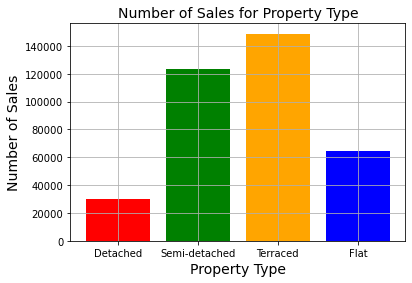

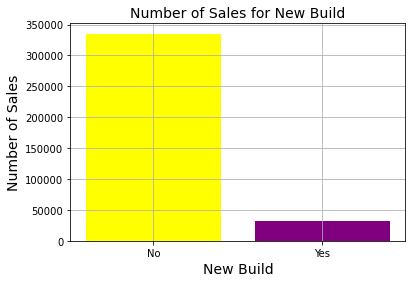

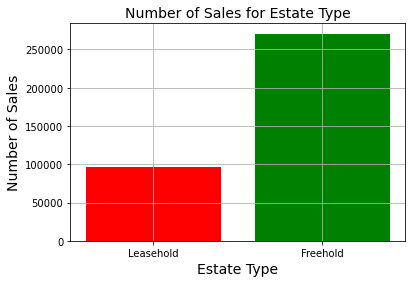

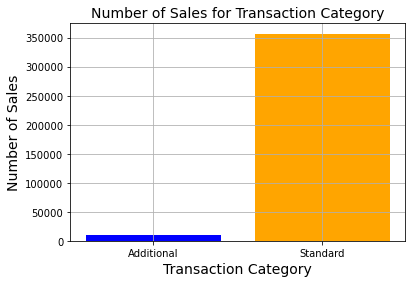

In [20]:
Type = ['Detached', 'Semi-detached', 'Terraced', 'Flat']
Type_Frequency =[df2[df2['property_type']=="D"].property_type.count(),df2[df2['property_type']=="S"].property_type.count(),df2[df2['property_type']=="T"].property_type.count(),df2[df2['property_type']=="F"].property_type.count()] 

plt.bar(Type, Type_Frequency, color= ['red','green','orange','blue'])
plt.title('Number of Sales for Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.grid(True)
plt.show()

NewBuild = ['No','Yes']
NewBuild_Frequency = [df2[df2['new_build']==0].new_build.count(),df2[df2['new_build']==1].new_build.count()]

plt.bar(NewBuild, NewBuild_Frequency, color= ['yellow','purple'])
plt.title('Number of Sales for New Build', fontsize=14)
plt.xlabel('New Build', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.grid(True)
plt.show()

Estate = ['Leasehold','Freehold']
Estate_Frequency = [df2[df2['estate_type']==0].estate_type.count(),df2[df2['estate_type']==1].estate_type.count()]

plt.bar(Estate, Estate_Frequency, color= ['red','green'])
plt.title('Number of Sales for Estate Type', fontsize=14)
plt.xlabel('Estate Type', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.grid(True)
plt.show()

Transaction = ['Additional','Standard']
Transaction_Frequency = [df2[df2['transaction_category']==0].transaction_category.count(),df2[df2['transaction_category']==1].transaction_category.count()]

plt.bar(Transaction, Transaction_Frequency, color= ['blue','orange'])
plt.title('Number of Sales for Transaction Category', fontsize=14)
plt.xlabel('Transaction Category', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.grid(True)
plt.show()                                                                                              # (5 marks)

# Q1(d) 
Create a data frame only containing data on detached houses. Let n be the number of days starting at n=1 for 1st January 1995 
and ending at n=9131 for 31st December 2019. Consider the number of sales of detached houses over each 365 day period. 
(Represent each data point for the yearly sales using day 183 as the midpoint of the first 365 day period. Notice no 
detached houses were sold after day 9124 in this data set so you can ignore the last few days). Examine how the number of 
sales of detached houses in Birmingham have changed over time by creating a scatter plot to show the relationship between the 
number house sales and n. Include the straight line of best fit. How well does your line fit the data? (5 marks)

In [21]:
detached = df2.copy()
detached.drop( detached[detached["property_type"] == "T"].index, inplace = True)
detached.drop( detached[detached["property_type"] == "S"].index, inplace = True)
detached.drop( detached[detached["property_type"] == "F"].index, inplace = True)
detached

,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC,days
2,165500,01/01/1995,B45 8LY,D,0,1,1,458,1
7,65000,03/01/1995,B23 5DN,D,0,0,1,235,3
38,128500,05/01/1995,B32 4BG,D,0,1,1,324,5
41,155000,05/01/1995,B46 2BY,D,0,1,1,462,5
47,85000,06/01/1995,B13 9JQ,D,0,1,1,139,6
...,...,...,...,...,...,...,...,...,...
370911,465000,20/12/2019,B37 7WH,D,1,1,1,377,9120
370914,269995,20/12/2019,B38 9EF,D,1,1,1,389,9120
370937,374995,20/12/2019,B45 8FS,D,1,1,1,458,9120
370960,245000,23/12/2019,B31 1TU,D,0,1,1,311,9123


In [22]:
detached = detached.sort_values(by=['days'])
indy=np.array(range(0,26)) # indy is an array to store the index where each 365 day period starts
count=1
indy[0]=0 # We use 0 to start 
for i in range(1,len(detached)):
    if int(detached.days.iloc[i]) >= count*365 and int(detached.days.iloc[i-1]) < count*365:
        indy[count]=i
        count=count+1
indy[count]=len(detached) # We use the final point to end
len(indy) # We have 25 periods and so need 26 indices to cover the start and end of each period

26

In [23]:
x1=np.linspace(0,9300,25)
y1=np.linspace(0,9300,25)
for i in range(0,25):
    x1[i]=183+i*365
    y1[i]=indy[i+1]-indy[i]
print(y1)

[ 897. 1079. 1279. 1294. 1570. 1523. 1576. 1575. 1284. 1513. 1052. 1362.
 1369.  791.  730.  787.  821.  877. 1075. 1275. 1330. 1386. 1335. 1275.
 1200.]


In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Line of best fit is y = -0.017317 x + 1289.218274


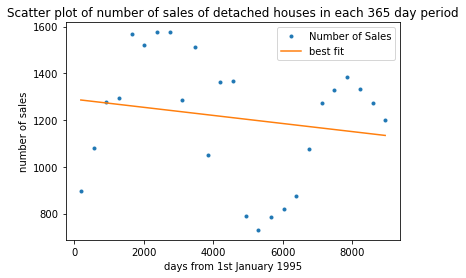

In [25]:
plt.title('Scatter plot of number of sales of detached houses in each 365 day period')
plt.xlabel('days from 1st January 1995')
plt.ylabel('number of sales')
a1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1,y1,".",label='Number of Sales')
plt.plot(x1, a1*x1+b1, label='best fit')
plt.legend()
print('Line of best fit is y = %f x + %f' % (a1, b1))

This is a very poor fit!                                                  # (5 marks)

# Q1(e) 
Determine the mean price for a detached house in each 365 day period. Use the mean house price over each 365 day period to represent the average price of the house on day 183 of each 365 day period. To examine how the prices of detached houses in Birmingham have changed over time, create a scatter plot to show the relationship between the mean house price and n. State and include the straight line of best fit. How well does your line fit the data? Using the line of best fit, normalise all of the price_paid data in your detached houses data frame and store these values in a column named 'normalised_price'. (4 marks) 

In [26]:
x=np.linspace(0,9300,25)
y=np.linspace(0,9300,25)
for i in range(0,25):
    x[i]=183+i*365
    y[i]=detached.price_paid[indy[i]:indy[i+1]].mean()
print(y)

[113875.07915273 108594.01668211 118452.81704457 125121.625966
 135446.57006369 157824.05252791 164435.45748731 194308.39555556
 244070.63707165 263021.57964309 284261.55798479 308136.06681351
 311671.81957633 307180.39064475 276329.43013699 307525.35324015
 295899.28136419 282556.4709236  295719.86511628 312330.77647059
 326805.86240602 343315.93434343 370127.14307116 398462.25568627
 395679.91333333]


Line of best fit is y = 32.067597 x + 111321.648083


,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC,days,normalised_price
2,165500,01/01/1995,B45 8LY,D,0,1,1,458,1,1.486255
7,65000,03/01/1995,B23 5DN,D,0,0,1,235,3,0.583389
38,128500,05/01/1995,B32 4BG,D,0,1,1,324,5,1.152653
41,155000,05/01/1995,B46 2BY,D,0,1,1,462,5,1.390359
122,136000,06/01/1995,B47 6LL,D,0,1,1,476,6,1.219577


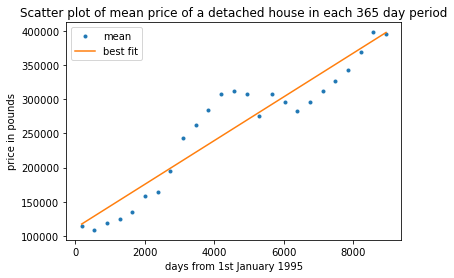

In [27]:
plt.title('Scatter plot of mean price of a detached house in each 365 day period')
plt.xlabel('days from 1st January 1995')
plt.ylabel('price in pounds')
a, b = np.polyfit(x, y, 1)
plt.plot(x,y,".",label='mean')
plt.plot(x, a*x+b, label='best fit')
plt.legend()
print('Line of best fit is y = %f x + %f' % (a, b))

detached["normalised_price"]=detached["price_paid"]/(a*detached["days"]+b)
detached.head()

This is a better than the previous scatter plot.                                              # (4 marks)

# Q1(f) 
Create a new Data frame only including PC and the mean normalised price_paid data for each PC. Determine the 'PC's with the 10 largest normalised price_paid for detached houses. (3 marks)

In [28]:
new_df = detached[["normalised_price","PC"]]
setpc = new_df.PC.unique()
p=np.array(range(0,len(setpc)))
q=np.linspace(0,200,len(setpc))
for i in range(0,len(setpc)):
    p[i] = setpc[i]
    q[i] = new_df.loc[new_df['PC']==setpc[i]].normalised_price.mean()

df_z = pd.DataFrame( [p,q] ).T
df_z = df_z.rename(columns={ 0:'PC',1:'normalised_price'} )
df_z = df_z.sort_values(by=['normalised_price'])
df_z.nlargest(10,'normalised_price')                                                            # (3 marks)

,PC,normalised_price
43,151.0,2.498197
35,152.0,2.173799
12,153.0,2.099902
0,458.0,1.630872
118,47.0,1.532598
11,178.0,1.529635
18,138.0,1.473641
31,179.0,1.431699
98,56.0,1.378142
15,297.0,1.358064


# Q1(g) 
For detached houses, split the data into (80%) training data and (20%) test data. Use an appropriate regression model from sklearn to predict the price_paid using the variables: 'days', 'PC', 'new_build', 'estate_type', and 'transaction_category'. 
Test your model using the test data set. Discuss your results. (4 marks)

In [29]:
import numpy as np     # numpy is for arrays
import seaborn as sns  # seaborn is for plotting
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df4 = detached.copy()
df5 = df4.drop(columns=['property_type','deed_date','postcode','normalised_price'])
X_house = df5.iloc[:, 1:] # we let X_house be the first column
y_house = df5['price_paid']  # we let Y_house be the last column
print(X_house.shape,y_house.shape)
print(X_house)

(30255, 5) (30255,)
       new_build estate_type transaction_category   PC  days
2              0           1                    1  458     1
7              0           0                    1  235     3
38             0           1                    1  324     5
41             0           1                    1  462     5
122            0           1                    1  476     6
...          ...         ...                  ...  ...   ...
370909         0           0                    1  377  9120
370911         1           1                    1  377  9120
370937         1           1                    1  458  9120
370960         0           1                    1  311  9123
370963         0           1                    1  459  9123

[30255 rows x 5 columns]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24204, 5) (6051, 5) (24204,) (6051,)


In [32]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred.shape,y_test.shape)

31672.86742793265
[-1.53852888e+04  6.49359645e+04  4.37854413e+04 -7.55917344e+01
  3.29206776e+01]
(6051,) (6051,)


In [33]:
c1, c2, c3, c4, c5 = regressor.coef_
[c1, c2, c3, c4, c5] = np.round([c1,c2,c3,c4,c5],3)
print('We have obtained an approximate equation for the price of a detached house')
print('Price = %f new build + %f estate type + %f transaction category + %f PC + %f days' %(c1, c2, c3, c4, c5))
print('Notice: a new build appears to decrease the price of a house')
print('As expected: : freehold (estate type) increases the price of a house')
print('Notice: standard (transaction category) appears to increase the price of a house')
print('As expected: postcode appears to decrease the price of a house')
print('As expected: days increases the price of a house')

We have obtained an approximate equation for the price of a detached house
Price = -15385.289000 new build + 64935.965000 estate type + 43785.441000 transaction category + -75.592000 PC + 32.921000 days
Notice: a new build appears to decrease the price of a house
As expected: : freehold (estate type) increases the price of a house
Notice: standard (transaction category) appears to increase the price of a house
As expected: postcode appears to decrease the price of a house
As expected: days increases the price of a house


In [34]:
error=0 
for i in range(0,len(y_pred)):
    error += (y_test.iloc[i]-y_pred[i])**2/y_test.iloc[i]**2
Error = error/len(y_pred)*100
print('Average error is %f percent of the value of a detached house' % Error)

Average error is 70.135724 percent of the value of a detached house


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

Mean Absolute Error:  102362.7748589995
Mean Squared Error:  24126100755.460163
R-squared:  0.23272658293271664


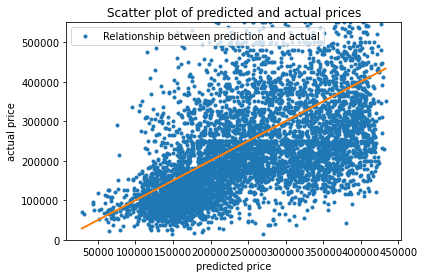

In [36]:
yy=np.linspace(0,1,len(y_pred))
for i in range(0,len(y_pred)):
    yy[i]=y_test.iloc[i]

plt.title('Scatter plot of predicted and actual prices')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.plot(y_pred,yy,".",label='Relationship between prediction and actual')
plt.plot(y_pred,y_pred)
plt.ylim([0, 550000])
plt.legend()

In [37]:
print('There is a very large spread of data, the model is not very good')                           # (4 marks)

There is a very large spread of data, the model is not very good


# Q1(h)
For detached houses, split the data into (80%) training data and (20%) test data. Normalise the data appropriately without using sklearn. Create a simple linear regression model using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (6 marks)

In [38]:
X=X_house.iloc[:].to_numpy(dtype=np.float64)
Y=y_house.iloc[:].to_numpy(dtype=np.float64)

X_min=np.min(X,axis=0)
X_max=np.max(X,axis=0)
Y_min=np.min(Y,axis=0)
Y_max=np.max(Y,axis=0)
X_norm=(X-X_min)/(X_max-X_min)
Y_norm=(Y-Y_min)/(Y_max-Y_min)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

import torch
import torch.nn as nn

X_train_torch= torch.FloatTensor(X_train)
X_test_torch= torch.FloatTensor(X_test)
Y_train_torch= torch.FloatTensor(Y_train)
Y_test_torch= torch.FloatTensor(Y_test)

# Same as linear regression!

class MyBasic(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 5
output_dim = 1
model = MyBasic(input_dim, output_dim)
criterion = nn.MSELoss()
learning_rate = 0.25
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for iter in range(0,10):
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    # Forward pass to get outputs
    outputs = model(X_train_torch)
    # Calculate Loss: MSE
    loss = criterion(outputs, Y_train_torch)
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()
    #LOSS
#    if (iter % 10 == 0): print("Iteration: {}. Loss: {}.".format(iter, loss))
    print("Iteration: {}. Loss: {}.".format(iter, loss))

print('Training Error= ',criterion(model(X_train_torch), Y_train_torch) )
print('Testing Error= ',criterion(model(X_test_torch), Y_test_torch) )   # (6 marks)

(24204, 5) (6051, 5) (24204,) (6051,)


C:\Users\trevelyp\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([24204])) that is different to the input size (torch.Size([24204, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration: 0. Loss: 0.2840575873851776.
Iteration: 1. Loss: 0.15672624111175537.
Iteration: 2. Loss: 0.08825242519378662.
Iteration: 3. Loss: 0.051325634121894836.
Iteration: 4. Loss: 0.03131609037518501.
Iteration: 5. Loss: 0.020385928452014923.
Iteration: 6. Loss: 0.014335495419800282.
Iteration: 7. Loss: 0.010913964360952377.
Iteration: 8. Loss: 0.008914503268897533.
Iteration: 9. Loss: 0.007689568214118481.
Training Error=  tensor(0.0069, grad_fn=<MseLossBackward0>)
Testing Error=  tensor(0.0065, grad_fn=<MseLossBackward0>)


C:\Users\trevelyp\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6051])) that is different to the input size (torch.Size([6051, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [39]:
# TEST
outputs = model(X_test_torch)
# Get prediction
Pr=torch.max(outputs.data, 1).values
# Set total error and total values
total_error=0
total=0
for i in range(0,len(Y_test_torch)):
#    print(Y_test_torch[i],Pr[i])
    total += Y_test_torch[i]**2
    total_error += (Y_test_torch[i]-Pr[i])**2
print('average error',np.sqrt(total_error/len(Y_test_torch)),'average value',np.sqrt(total/len(Y_test_torch)))

average error tensor(0.0779) average value tensor(0.0647)


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(Y_test_torch, Pr))
print("Mean Squared Error: ", mean_squared_error(Y_test_torch, Pr))
print("R-squared: ", r2_score(Y_test_torch, Pr))

Mean Absolute Error:  0.05458259
Mean Squared Error:  0.0060612694
R-squared:  -3.302472508409564


# Q1(i) 
Create and train a multi-layer perceptron with one hidden layer (with an appropriate size with justification) using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (3 marks)

In [41]:
class MyBasic2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear( hidden_dim, output_dim)
    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.sigmoid(out1)
        out3 = self.linear2(out2)
        return out3

input_dim = 5
hidden_dim = 10
output_dim = 1
model = MyBasic2(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
learning_rate = 0.25
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
for iter in range(0,10):
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    # Forward pass to get output
    outputs = model(X_train_torch)
    # Calculate Loss: MSE
    loss = criterion(outputs, Y_train_torch)
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()
    #LOSS
    #    if (iter % 10 == 0): print("Iteration: {}. Loss: {}.".format(iter, loss))
    print("Iteration: {}. Loss: {}.".format(iter, loss))
    
print('Training Error= ',criterion(model(X_train_torch), Y_train_torch) )
print('Testing Error= ',criterion(model(X_test_torch), Y_test_torch) )                            # (3 marks)

C:\Users\trevelyp\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([24204])) that is different to the input size (torch.Size([24204, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration: 0. Loss: 0.2872501015663147.
Iteration: 1. Loss: 0.28218913078308105.
Iteration: 2. Loss: 0.26429450511932373.
Iteration: 3. Loss: 0.2395361065864563.
Iteration: 4. Loss: 0.2075495421886444.
Iteration: 5. Loss: 0.17489786446094513.
Iteration: 6. Loss: 0.14213939011096954.
Iteration: 7. Loss: 0.11330301314592361.
Iteration: 8. Loss: 0.08807815611362457.
Iteration: 9. Loss: 0.06774437427520752.
Training Error=  tensor(0.0513, grad_fn=<MseLossBackward0>)
Testing Error=  tensor(0.0505, grad_fn=<MseLossBackward0>)


C:\Users\trevelyp\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6051])) that is different to the input size (torch.Size([6051, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [42]:
# TEST
outputs = model(X_test_torch)
# Get prediction
Pr=torch.max(outputs.data, 1).values
# Set total error and total values
total_error=0
total=0
for i in range(0,len(Y_test_torch)):
#    print(Y_test_torch[i],Pr[i])
    total += Y_test_torch[i]**2
    total_error += (Y_test_torch[i]-Pr[i])**2
print('average error',np.sqrt(total_error/len(Y_test_torch)), 'average value',np.sqrt(total/len(Y_test_torch)))

average error tensor(0.2249) average value tensor(0.0647)


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(Y_test_torch, Pr))
print("Mean Squared Error: ", mean_squared_error(Y_test_torch, Pr))
print("R-squared: ", r2_score(Y_test_torch, Pr))

Mean Absolute Error:  0.22116336
Mean Squared Error:  0.05057287
R-squared:  -34.898150819188615


# Q2(a) 
Read in all 20 csv files. Create a single data frame with 2376 rows and 1120 columns. Remove all schools that have closed down (see row 13). Remove all schools which don’t provide secondary school education or post 16 education, i.e. remove schools with a ’0’ in rows 19 or 20. Additionally remove all schools which don't have an Ofsted rating (see row 26). Finally remove all schools which don't have an average point score or a non float number in best 3 A level entries (see row 1930). You data frame should now have 2376 rows and 167 columns. (6 marks)

In [44]:
import numpy as np 
import pandas as pd 

In [45]:
df1= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_1-50.csv')
df2= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_51-100.csv')
df3= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_101-150.csv')
df4= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_151-200.csv')
df5= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_201-250.csv')
df6= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_251-300.csv')
df7= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_301-350.csv')
df8= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_351-400.csv')
df9= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_401-450.csv')
df10= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_451-500.csv')
df11= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_501-550.csv')
df12= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_551-600.csv')
df13= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_601-650.csv')
df14= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_651-700.csv')
df15= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_701-750.csv')
df16= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_751-800.csv')
df17= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_801-850.csv')
df18= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_851-900.csv')
df19= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_901-950.csv')
df20= pd.read_csv( 'C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/Schools_951-1000.csv')
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
df = pd.concat(frames,axis=1)

In [46]:
print(df.shape) 

(2376, 1120)


In [47]:
list_closed=[]
n=df.shape[1]
for i in range(0,n):
    if df.iloc[11,i]=='Closed':
        list_closed += [i]
print(list_closed)

[5, 13, 21, 29, 34, 38, 39, 42, 49, 52, 59, 81, 82, 99, 119, 126, 133, 134, 139, 164, 182, 187, 193, 245, 248, 268, 276, 304, 305, 311, 345, 356, 359, 365, 369, 374, 384, 400, 407, 423, 438, 453, 457, 514, 517, 533, 544, 550, 567, 570, 575, 591, 599, 632, 646, 649, 668, 678, 686, 695, 704, 709, 722, 738, 747, 750, 759, 762, 767, 774, 778, 804, 815, 817, 833, 834, 849, 853, 868, 884, 886, 887, 902, 905, 933, 937, 945, 959, 962, 1013, 1049, 1068, 1084, 1100, 1108, 1111]


In [48]:
df.drop(df.columns[list_closed], axis=1, inplace=True)

In [49]:
print(df.shape)

(2376, 1024)


In [50]:
list_nonsecondary=[]
m=df.shape[1]
for i in range(0,m):
    if df.iloc[17,i]=='0' or df.iloc[18,i]=='0':
        list_nonsecondary += [i]
len(list_nonsecondary)

735

In [51]:
df.drop(df.columns[list_nonsecondary], axis=1, inplace=True)

In [52]:
print(df.shape) 

(2376, 289)


In [53]:
tmp = df.iloc[24,:].isnull()
list_no_ofsted=[]
p=df.shape[1]
for i in range(0,p):
    if tmp.iloc[i] == True:
        list_no_ofsted += [i]
print(list_no_ofsted)

[3, 6, 8, 11, 15, 16, 18, 19, 20, 25, 26, 28, 30, 31, 32, 33, 35, 36, 38, 39, 44, 45, 47, 48, 51, 52, 53, 54, 60, 63, 65, 68, 69, 71, 74, 75, 86, 87, 88, 94, 103, 104, 109, 111, 118, 119, 120, 131, 132, 142, 143, 149, 151, 153, 154, 166, 167, 183, 184, 191, 194, 195, 202, 205, 207, 211, 212, 217, 222, 223, 224, 229, 235, 236, 242, 248, 249, 254, 255, 260, 261, 273, 274, 280, 286, 287]


In [54]:
df.drop(df.columns[list_no_ofsted], axis=1, inplace=True) 

In [55]:
print(df.shape) 

(2376, 203)


In [56]:
tmp2 = df.iloc[1928,:].isnull()
list_no_Alevels=[]
q=df.shape[1]
for i in range(0,q):
    if tmp2.iloc[i] == True :
        list_no_Alevels += [i]
print(list_no_Alevels)

[3, 4, 19, 31, 35, 44, 46, 54, 55, 56, 58, 67, 68, 71, 73, 79, 80, 83, 88, 89, 97, 104, 115, 116, 117, 118, 130, 131, 138, 145, 167, 185, 186, 189, 197, 198]


In [57]:
df.drop(df.columns[list_no_Alevels], axis=1, inplace=True)                                # (6 marks) 

In [58]:
print(df.shape) 

(2376, 167)


In [59]:
df

,No,Namespace,Variable,Birmingham Ormiston Academy - 136944,Aston University Engineering Academy - 138222,South and City College Birmingham - 130461,Heartlands Academy - 135907,Aston Manor Academy - 136882,Nishkam High School - 138586,Ark St Alban's Academy - 135970,...,Ormiston Shelfield Community Academy - 135769,Description,No,Namespace,Variable,Bloxwich Academy - 137274,Ellowes Hall Sports College - 141570,Shire Oak Academy - 136620,Pool Hayes Academy - 142594,Description
0,1,L,URN,136944,138222,130461,135907,136882,138586,135970,...,135769,School unique reference number,1,L,URN,137274,141570,136620,142594,School unique reference number
1,2,L,LANAME,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,Birmingham,...,Walsall,Local authority name,2,L,LANAME,Walsall,Dudley,Walsall,Walsall,Local authority name
2,3,L,LA,330,330,330,330,330,330,330,...,335,Local authority number,3,L,LA,335,332,335,335,Local authority number
3,4,L,ESTAB,4000,4003,8006,6905,4220,4004,6908,...,6906,Establishment number,4,L,ESTAB,4001,5401,5402,4106,Establishment number
4,5,L,LAESTAB,3304000,3304003,3308006,3306905,3304220,3304004,3306908,...,3356906,DfE number,5,L,LAESTAB,3354001,3325401,3355402,3354106,DfE number
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,2372,KS5_19,PT_RETAINED_TLEV_RET_NOTDIS_17,85.9%,77.1%,86.0%,SUPP,SUPP,NE,NE,...,SUPP,This is a historical variable. It holds the 20...,2372,KS5_19,PT_RETAINED_TLEV_RET_NOTDIS_17,SUPP,NE,SUPP,SUPP,This is a historical variable. It holds the 20...
2372,2373,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_18,NE,NE,136,NE,NE,NE,NE,...,NE,This is a historical variable. It holds the 20...,2373,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_18,NE,NE,NE,NE,This is a historical variable. It holds the 20...
2373,2374,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_17,NE,NE,106,NE,NE,NE,NE,...,NE,This is a historical variable. It holds the 20...,2374,KS5_19,T_INSCOPE_TECHCERT_RET_NOTDIS_17,NE,NE,NE,NE,This is a historical variable. It holds the 20...
2374,2375,KS5_19,PT_RETAINED_TECHCERT_RET_NOTDIS_18,NE,NE,88.2%,NE,NE,NE,NE,...,NE,This is a historical variable. It holds the 20...,2375,KS5_19,PT_RETAINED_TECHCERT_RET_NOTDIS_18,NE,NE,NE,NE,This is a historical variable. It holds the 20...


# Q2(b)
To simplify things keep rows 12, 26, 49, 81, 359, 769, 770, 771, 1482, 1930 and 1933 and remove all other rows. 
You should now be left with 11 rows and 167 columns. Transpose the data frame. Rename each column 'postcode', 'Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels' and 'ratio_AAB'. Now remove the first 3 rows. You should now have 107 rows and 11 columns. (Notice 60 rows have gone due to repetition when reading in the 20 data files). (3 marks)

In [60]:
list_rows=[*range(0,10), *range(11,24), *range(25,47), *range(48,79), *range(80,357), *range(358,767), *range(770,1480), *range(1481,1928), 1929, 1930, *range(1932,2376)]
print(len(list_rows))

2365


In [61]:
df.drop(df.index[list_rows], axis=0, inplace=True)
print(df.shape)

(11, 167)


In [62]:
df

,No,Namespace,Variable,Birmingham Ormiston Academy - 136944,Aston University Engineering Academy - 138222,South and City College Birmingham - 130461,Heartlands Academy - 135907,Aston Manor Academy - 136882,Nishkam High School - 138586,Ark St Alban's Academy - 135970,...,Ormiston Shelfield Community Academy - 135769,Description,No,Namespace,Variable,Bloxwich Academy - 137274,Ellowes Hall Sports College - 141570,Shire Oak Academy - 136620,Pool Hayes Academy - 142594,Description
10,11,L,POSTCODE,B4 7QD,B7 4AG,B5 5SU,B7 4QR,B6 4PZ,B19 2LF,B12 0YH,...,WS4 1BW,School postcode,11,L,POSTCODE,WS2 7NR,DY3 2JH,WS9 9PA,WV12 4QZ,School postcode
24,25,L,OFSTEDRATING,Good,Good,Good,Outstanding,Outstanding,Outstanding,Requires improvement,...,Requires improvement,Ofsted rating,25,L,OFSTEDRATING,Good,Requires improvement,Requires improvement,Good,Ofsted rating
47,48,CENSUS_19,PNUMFSMEVER,13,50.7,NaN,71.7,70,31.1,74.2,...,50.8,Percentage of pupils eligible for FSM at any t...,48,CENSUS_19,PNUMFSMEVER,66.7,23.7,29.5,47.2,Percentage of pupils eligible for FSM at any t...
79,80,SWF_19,RATPUPTEA,18.1,NaN,NaN,15.4,13.3,15.2,13.4,...,14.7,Pupil:Teacher Ratio,80,SWF_19,RATPUPTEA,15.7,17.1,14.8,15.9,Pupil:Teacher Ratio
357,358,ABS_19,PPERSABS10,11.8,27.4,NaN,8.8,15.2,7.4,7.9,...,20.4,Percentage of enrolments who are persistent ab...,358,ABS_19,PPERSABS10,16,20.3,15,19.4,Percentage of enrolments who are persistent ab...
767,768,KS5_STUDEST_19,ALL_TOP3RD,8%,15%,1%,6%,5%,13%,10%,...,2%,Top third,768,KS5_STUDEST_19,ALL_TOP3RD,0%,7%,16%,5%,Top third
768,769,KS5_STUDEST_19,ALL_RUSSELL,4%,9%,1%,6%,5%,6%,10%,...,2%,Russell,769,KS5_STUDEST_19,ALL_RUSSELL,0%,7%,14%,5%,Russell
769,770,KS5_STUDEST_19,ALL_OXBRIDGE,0%,0%,0%,0%,0%,0%,0%,...,0%,Oxbridge,770,KS5_STUDEST_19,ALL_OXBRIDGE,0%,0%,0%,0%,Oxbridge
1480,1481,KS4_19,PTL2BASICS_95,58%,24%,2%,71%,41%,60%,44%,...,25%,% of pupils achieving strong 9-5 passes in bot...,1481,KS4_19,PTL2BASICS_95,16%,45%,37%,25%,% of pupils achieving strong 9-5 passes in bot...
1928,1929,KS5_19,TB3PTSE,11.67,22.07,25.22,25.15,28.21,30.98,32.63,...,24.93,Average point score in best 3 A level entries,1929,KS5_19,TB3PTSE,28.21,22.90,32.70,28.13,Average point score in best 3 A level entries


In [63]:
df = df.T
df.shape

(167, 11)

In [64]:
df=df.set_axis(['postcode','Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels', 'AAB'],axis=1, inplace=False)

In [65]:
df.drop(df.index[[0,1,2]], axis=0, inplace=True)
print(df.shape)                                                   # (3 marks) 

(107, 11)


In [66]:
df.shape

(107, 11)

In [67]:
df

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB
Birmingham Ormiston Academy - 136944,B4 7QD,Good,13,18.1,11.8,8%,4%,0%,58%,11.67,0.0%
Aston University Engineering Academy - 138222,B7 4AG,Good,50.7,NaN,27.4,15%,9%,0%,24%,22.07,13.3%
South and City College Birmingham - 130461,B5 5SU,Good,NaN,NaN,NaN,1%,1%,0%,2%,25.22,3.8%
Heartlands Academy - 135907,B7 4QR,Outstanding,71.7,15.4,8.8,6%,6%,0%,71%,25.15,0.0%
Aston Manor Academy - 136882,B6 4PZ,Outstanding,70,13.3,15.2,5%,5%,0%,41%,28.21,7.7%
...,...,...,...,...,...,...,...,...,...,...,...
Bloxwich Academy - 137274,WS2 7NR,Good,66.7,15.7,16,0%,0%,0%,16%,28.21,0.0%
Ellowes Hall Sports College - 141570,DY3 2JH,Requires improvement,23.7,17.1,20.3,7%,7%,0%,45%,22.90,3.2%
Shire Oak Academy - 136620,WS9 9PA,Requires improvement,29.5,14.8,15,16%,14%,0%,37%,32.70,14.3%
Pool Hayes Academy - 142594,WV12 4QZ,Good,47.2,15.9,19.4,5%,5%,0%,25%,28.13,12.5%


# Q2(c) 
In the column named ’Ofsted rating’ convert ’Outstanding’ to 4, ’Good’ to 3, ’Requires improvement’ to 1 and ’Inadequate’ to 1. Also remove all % symbols from the data frame. Remove the schools with null values in 'PT_ratio' and 'top_third'. Remove the schools with values of 'NE' or 'SUPP' in 'AAB'. You should now have 92 rows and 11 columns. Remove all schools who's postcode does not start with a B, then use the same method you used in Task 1 to convert the remaining postcodes to a 3 digit number and label this column ’PC’. You should now have 56 rows and 12 columns. (6 marks)

In [68]:
condition1 = df["Ofsted"] == "Outstanding"
df.loc[condition1,"Ofsted"] = 4
condition2 = df["Ofsted"] == "Good"
df.loc[condition2,"Ofsted"] = 3
condition3 = df["Ofsted"] == "Requires improvement"
df.loc[condition3,"Ofsted"] = 2
condition4 = df["Ofsted"] == "Inadequate"
df.loc[condition4,"Ofsted"] = 1

In [69]:
df.shape

(107, 11)

In [70]:
df["top_third"] = df["top_third"].str.replace("%", "")
df["Russell"] = df["Russell"].str.replace("%", "")
df["Oxbridge"] = df["Oxbridge"].str.replace("%", "")
df["GCSE"] = df["GCSE"].str.replace("%", "")
df["AAB"] = df["AAB"].str.replace("%", "")
df["FSM"] = df["FSM"].str.replace("%", "")

In [71]:
df.shape

(107, 11)

In [72]:
tmp3 = df.PT_ratio.isnull()
tmp4 = df.top_third.isnull()
tmp5 = df.AAB
list_null=[]
r=df.shape[0]
for i in range(0,r):
    if tmp3.iloc[i] == True :
        list_null += [i]
    elif tmp4.iloc[i] == True :
        list_null += [i]
    elif tmp5.iloc[i] == 'NE' or tmp5.iloc[i] == 'SUPP':
        list_null += [i]
print(list_null)

[1, 2, 18, 19, 37, 40, 47, 48, 66, 70, 83, 86, 93, 98, 99]


In [73]:
df.drop(df.index[list_null], axis=0, inplace=True)
print(df.shape)

(92, 11)


In [74]:
list_nonB=[]
q=df.shape[0]
for i in range(0,q):
    if df.postcode[i][0] != 'B':
        list_nonB += [i]
print(list_nonB)

[5, 9, 13, 19, 24, 30, 33, 36, 40, 41, 45, 48, 56, 58, 62, 64, 66, 67, 69, 71, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91]


In [75]:
df.drop(df.index[list_nonB], axis=0, inplace=True)
print(df.shape)

(56, 11)


In [76]:
df["PC"] = df["postcode"]

In [77]:
df["PC"] = df["PC"].str.replace(" ", "")

In [78]:
df["PC"] = df["PC"].str[1:-2]                                                        # (6 marks) 

In [79]:
df.shape

(56, 12)

In [80]:
df

,postcode,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB,PC
Birmingham Ormiston Academy - 136944,B4 7QD,3,13,18.1,11.8,8,4,0,58,11.67,0.0,47
Heartlands Academy - 135907,B7 4QR,4,71.7,15.4,8.8,6,6,0,71,25.15,0.0,74
Aston Manor Academy - 136882,B6 4PZ,4,70,13.3,15.2,5,5,0,41,28.21,7.7,64
Nishkam High School - 138586,B19 2LF,4,31.1,15.2,7.4,13,6,0,60,30.98,5.9,192
Ark St Alban's Academy - 135970,B12 0YH,2,74.2,13.4,7.9,10,10,0,44,32.63,3.0,120
Holte School - 103509,B19 2EP,2,71.2,13.1,11.8,9,9,0,18,22.00,4.0,192
King Edward VI Aston School - 137043,B6 6DJ,4,27.2,17.6,11.7,59,53,2,97,35.93,28.2,66
Bordesley Green Girls' School & Sixth Form - 103493,B9 4TR,3,53,14.4,12.4,9,9,0,41,29.33,2.2,94
King Edward VI Handsworth School - 137047,B21 9AR,4,18,18.5,7.5,65,58,6,99,38.46,25.9,219
St Paul's School for Girls - 103531,B16 9SL,4,37.8,14.8,7.1,23,22,0,71,35.79,8.2,169


# Q2(d)
Create a data frame called ’Full’ containing ’PC’, ’Ofsted’, ’FSM’, ’PT_ratio’, ’absentees’, ’top_third’, ’Russell’, ’Oxbridge’, ’GCSE’, ’best_3Alevels’ and ’AAB’ which are the mean values for all the schools with the same value of ’PC’. Ensure all numbers are floating point numbers. (3 marks) 

In [81]:
for i in range(0,df.shape[0]):
    for j in range(2,df.shape[1]):
        df.iloc[i,j]=float(df.iloc[i,j])

In [82]:
Full = df
unique_PC = Full.PC.unique()
print(len(unique_PC))
p=np.linspace(0,201,len(unique_PC))
q=np.linspace(0,201,len(unique_PC))
r=np.linspace(0,201,len(unique_PC))
s=np.linspace(0,201,len(unique_PC))
t=np.linspace(0,201,len(unique_PC))
u=np.linspace(0,201,len(unique_PC))
v=np.linspace(0,201,len(unique_PC))
w=np.linspace(0,201,len(unique_PC))
x=np.linspace(0,201,len(unique_PC))
y=np.linspace(0,201,len(unique_PC))
z=np.linspace(0,201,len(unique_PC))

48


In [83]:
for i in range(0,len(unique_PC)):
    p[i] = unique_PC[i]
    q[i] = Full.loc[Full['PC']==unique_PC[i]].Ofsted.mean()
    r[i] = Full.loc[Full['PC']==unique_PC[i]].FSM.mean()
    s[i] = Full.loc[Full['PC']==unique_PC[i]].PT_ratio.mean()
    t[i] = Full.loc[Full['PC']==unique_PC[i]].absentees.mean()
    u[i] = Full.loc[Full['PC']==unique_PC[i]].top_third.mean()
    v[i] = Full.loc[Full['PC']==unique_PC[i]].Russell.mean()
    w[i] = Full.loc[Full['PC']==unique_PC[i]].Oxbridge.mean()
    x[i] = Full.loc[Full['PC']==unique_PC[i]].GCSE.mean()
    y[i] = Full.loc[Full['PC']==unique_PC[i]].best_3Alevels.mean()
    z[i] = Full.loc[Full['PC']==unique_PC[i]].AAB.mean()

Full = pd.DataFrame( [p,q,r,s,t,u,v,w,x,y,z] )

In [84]:
Full=Full.T

In [85]:
Full.shape

(48, 11)

In [86]:
Full=Full.set_axis(['PC','Ofsted', 'FSM', 'PT_ratio', 'absentees', 'top_third', 'Russell', 'Oxbridge', 'GCSE', 'best_3Alevels', 'AAB'],axis=1, inplace=False)

In [87]:
Full                                                           # (3 marks) 

,PC,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB
0,47.0,3.000000,13.000000,18.100000,11.800000,8.000000,4.000000,0.000000,58.0,11.670000,0.00
1,74.0,4.000000,71.700000,15.400000,8.800000,6.000000,6.000000,0.000000,71.0,25.150000,0.00
2,64.0,4.000000,70.000000,13.300000,15.200000,5.000000,5.000000,0.000000,41.0,28.210000,7.70
3,192.0,3.000000,51.150000,14.150000,9.600000,11.000000,7.500000,0.000000,39.0,26.490000,4.95
4,120.0,2.000000,74.200000,13.400000,7.900000,10.000000,10.000000,0.000000,44.0,32.630000,3.00
5,66.0,4.000000,27.200000,17.600000,11.700000,59.000000,53.000000,2.000000,97.0,35.930000,28.20
6,94.0,3.000000,53.000000,14.400000,12.400000,9.000000,9.000000,0.000000,41.0,29.330000,2.20
7,219.0,4.000000,17.900000,17.800000,7.200000,51.500000,45.000000,3.500000,96.0,35.550000,21.60
8,169.0,3.500000,48.750000,13.700000,11.450000,14.000000,13.500000,0.000000,49.5,33.820000,8.25
9,203.0,3.000000,59.300000,15.700000,5.100000,11.000000,11.000000,0.000000,33.0,26.260000,6.10


# Q2(e)
Obtain the pairwise correlation of the Full data frame and discuss any key results. (2 marks)

In [88]:
Full.corr()

,PC,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB
PC,1.000000,0.044836,-0.564754,0.094043,-0.231168,0.257515,0.214279,0.100870,0.042308,0.259473,0.141818
Ofsted,0.044836,1.000000,-0.246143,0.118802,-0.315328,0.332270,0.311024,0.282838,0.556095,0.354412,0.416530
FSM,-0.564754,-0.246143,1.000000,-0.480170,0.482344,-0.590286,-0.540213,-0.448496,-0.588308,-0.410709,-0.502501
PT_ratio,0.094043,0.118802,-0.480170,1.000000,-0.163546,0.521794,0.509912,0.481685,0.544493,0.332144,0.604934
absentees,-0.231168,-0.315328,0.482344,-0.163546,1.000000,-0.366482,-0.334907,-0.295811,-0.524169,-0.365340,-0.339994
top_third,0.257515,0.332270,-0.590286,0.521794,-0.366482,1.000000,0.995430,0.917396,0.736738,0.648879,0.700754
Russell,0.214279,0.311024,-0.540213,0.509912,-0.334907,0.995430,1.000000,0.930796,0.708291,0.649654,0.686578
Oxbridge,0.100870,0.282838,-0.448496,0.481685,-0.295811,0.917396,0.930796,1.000000,0.640857,0.551602,0.637668
GCSE,0.042308,0.556095,-0.588308,0.544493,-0.524169,0.736738,0.708291,0.640857,1.000000,0.568996,0.770796
best_3Alevels,0.259473,0.354412,-0.410709,0.332144,-0.365340,0.648879,0.649654,0.551602,0.568996,1.000000,0.765238


Unsurprisingly we notice that FSM and absentees correlate negatively with everything except themselves and each other. 
Surprisingly the PT_ratio has a positive correlation with Ofsted, top_third, Russell, Oxbridge, GCSE, best_3Alevels and AAB.    # (2 marks) 

# Q2(f)
Create a single data frame including 'PC', 'normalised_price' from task 1 and the rest of the measures of performance in the data frame Full. Perform any statistical analysis you wish with graphs if appropriate. Use an appropriate regression model from sklearn to predict the 'normalised_price' using 'PC' and the other variables in your data frame. Test your model and using test data set. Discuss your results. (10 marks)

In [89]:
Full = Full.sort_values(by='PC')
df_z = df_z.sort_values(by='PC')
unique_PC_list = list(set(df_z.PC).intersection(set(Full.PC)))
unique_PC_list.sort()
print(unique_PC_list)

[47.0, 66.0, 74.0, 82.0, 94.0, 95.0, 120.0, 130.0, 139.0, 147.0, 169.0, 178.0, 192.0, 201.0, 202.0, 203.0, 210.0, 219.0, 262.0, 301.0, 323.0, 324.0, 357.0, 369.0, 375.0, 388.0, 437.0, 440.0, 448.0, 459.0, 463.0, 475.0]


In [90]:
New_Full = Full
New_df_z = df_z
iFull = []
for i in range(len(New_Full.PC)):
    if New_Full.PC[i] not in unique_PC_list:
        iFull += [i]
idf = []
for i in range(len(New_df_z.PC)):
    if New_df_z.PC[i] not in unique_PC_list:
        idf += [i]
New_Full = New_Full.drop(iFull,axis=0)
New_df_z= New_df_z.drop(idf,axis=0)
print(len(New_Full.PC),len(New_df_z.PC))

32 32


In [91]:
New_df_z['normalised_price'].head()

118    1.532598
110    0.723259
97     0.583979
58     0.637840
45     0.591716
Name: normalised_price, dtype: float64

In [92]:
New_Full['normalised_price']=New_df_z['normalised_price']

In [93]:
for i in range(len(New_Full.PC)):
    New_Full.normalised_price.iloc[i]=New_df_z.normalised_price.iloc[i]

In [94]:
New_Full

,PC,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB,normalised_price
0,47.0,3.000000,13.000000,18.100000,11.800000,8.000000,4.000000,0.000000,58.0,11.670000,0.00,1.532598
5,66.0,4.000000,27.200000,17.600000,11.700000,59.000000,53.000000,2.000000,97.0,35.930000,28.20,0.723259
1,74.0,4.000000,71.700000,15.400000,8.800000,6.000000,6.000000,0.000000,71.0,25.150000,0.00,0.583979
13,82.0,3.000000,58.300000,13.700000,18.400000,3.000000,3.000000,0.000000,32.0,25.760000,0.00,0.637840
6,94.0,3.000000,53.000000,14.400000,12.400000,9.000000,9.000000,0.000000,41.0,29.330000,2.20,0.591716
10,95.0,3.000000,50.300000,15.100000,17.000000,5.000000,5.000000,0.000000,37.0,25.180000,4.30,0.555787
4,120.0,2.000000,74.200000,13.400000,7.900000,10.000000,10.000000,0.000000,44.0,32.630000,3.00,1.037026
20,130.0,4.000000,52.100000,15.000000,13.000000,9.000000,7.000000,0.000000,40.0,33.270000,1.80,0.890778
16,139.0,3.000000,52.100000,16.800000,17.800000,12.000000,12.000000,0.000000,33.0,35.780000,10.00,1.266899
17,147.0,3.666667,21.266667,16.933333,7.666667,63.333333,56.333333,4.666667,86.0,40.926667,38.60,0.950634


In [95]:
New_Full.corr()

,PC,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB,normalised_price
PC,1.000000,-0.261978,-0.218380,0.151836,0.221640,-0.133494,-0.140545,-0.092804,-0.234332,0.042554,0.024476,-0.188396
Ofsted,-0.261978,1.000000,-0.200108,0.340771,-0.318737,0.489438,0.488231,0.511743,0.622041,0.314550,0.416419,-0.154533
FSM,-0.218380,-0.200108,1.000000,-0.543173,0.393491,-0.523025,-0.486098,-0.515541,-0.548192,-0.230396,-0.508144,-0.382540
PT_ratio,0.151836,0.340771,-0.543173,1.000000,-0.142999,0.562967,0.551254,0.539682,0.516931,0.257478,0.609133,0.127744
absentees,0.221640,-0.318737,0.393491,-0.142999,1.000000,-0.409799,-0.395313,-0.392937,-0.562178,-0.309387,-0.316781,-0.255596
top_third,-0.133494,0.489438,-0.523025,0.562967,-0.409799,1.000000,0.996631,0.938459,0.864774,0.684210,0.947354,-0.002867
Russell,-0.140545,0.488231,-0.486098,0.551254,-0.395313,0.996631,1.000000,0.928148,0.851930,0.711715,0.946152,-0.018965
Oxbridge,-0.092804,0.511743,-0.515541,0.539682,-0.392937,0.938459,0.928148,1.000000,0.829986,0.619529,0.907542,-0.085568
GCSE,-0.234332,0.622041,-0.548192,0.516931,-0.562178,0.864774,0.851930,0.829986,1.000000,0.482378,0.766586,0.055635
best_3Alevels,0.042554,0.314550,-0.230396,0.257478,-0.309387,0.684210,0.711715,0.619529,0.482378,1.000000,0.723277,0.006387


In [96]:
New_Full.describe()

,PC,Ofsted,FSM,PT_ratio,absentees,top_third,Russell,Oxbridge,GCSE,best_3Alevels,AAB,normalised_price
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,249.656250,3.145833,43.536458,15.672917,12.664583,16.197917,14.229167,0.505208,48.156250,29.429115,8.576562,0.810039
std,137.396673,0.575407,17.458572,1.805303,5.147343,18.255968,16.035677,1.342365,20.174816,6.116042,10.310345,0.285033
min,47.000000,2.000000,13.000000,13.000000,5.100000,0.000000,0.000000,0.000000,23.000000,11.670000,0.000000,0.423899
25%,136.750000,3.000000,27.150000,14.262500,8.275000,6.000000,5.000000,0.000000,37.000000,25.697500,1.875000,0.603940
50%,206.500000,3.000000,49.525000,15.250000,12.100000,11.000000,9.500000,0.000000,43.000000,28.815000,5.450000,0.719663
75%,370.500000,3.541667,55.800000,16.862500,16.250000,14.250000,12.375000,0.000000,50.125000,33.452500,10.500000,1.017870
max,475.000000,4.000000,74.200000,20.100000,25.400000,71.000000,60.000000,5.000000,97.000000,41.520000,40.200000,1.532598


In [97]:
New_Full.to_csv('C:/Users/trevelyp/Documents/Teaching/AM41DP/CW_TP1_Main/New_Full.csv')   

In [98]:
import numpy as np     # numpy is for arrays
import seaborn as sns  # seaborn is for plotting
import pandas as pd
import matplotlib.pyplot as plt

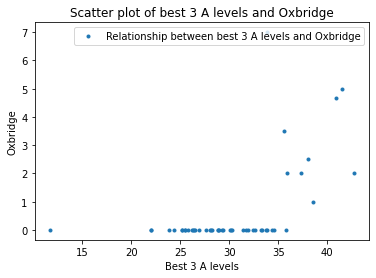

In [99]:
plt.title('Scatter plot of best 3 A levels and Oxbridge')
plt.xlabel('Best 3 A levels')
plt.ylabel('Oxbridge')
plt.plot(Full.best_3Alevels,Full.Oxbridge,".",label='Relationship between best 3 A levels and Oxbridge')
# plt.ylim([0.4, 1.0])
plt.legend()

For example this graphs shows that if the percentatge of students getting AAB is under 35% then no one in the school goes to Oxbridge

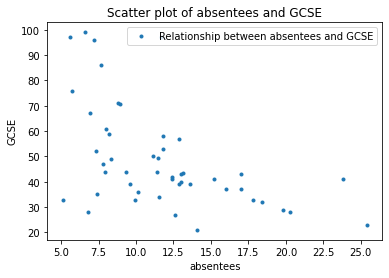

In [100]:
plt.title('Scatter plot of absentees and GCSE')
plt.xlabel('absentees')
plt.ylabel('GCSE')
plt.plot(Full.absentees,Full.GCSE,".",label='Relationship between absentees and GCSE')
# plt.ylim([0.4, 1.0])
plt.legend()

For example this graphs shows that the GCSE results are better if the number of absentees is under 10%

In [101]:
X_comb = New_Full.iloc[:, :-1] # we let X_house be the first column
y_comb = New_Full['normalised_price']  # we let Y_house be the last column
# print(X_comb.shape,y_comb.shape)
# print(X_comb)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_comb, y_comb, test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25, 11) (7, 11) (25,) (7,)


In [103]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred.shape,y_test.shape)

1.475917654522191
[-0.00149668 -0.13003657 -0.01218939  0.02231592  0.00044735 -0.00101341
 -0.01063797 -0.09985091  0.00054726  0.0147643   0.00903779]
(7,) (7,)


In [104]:
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11 = regressor.coef_
[c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11 ] = np.round([c1,c2,c3,c4,c5, c6, c7, c8, c9, c10, c11 ],3)
print('We have obtained an approximate equation for the price of a detached house')
print('Price = %f PC + %f Ofsted + %f FSM + %f PT_ratio + %f absentees + %f top_third + %f Russell + %f Oxbridge + %f GCSE + %f best_3Alevels + %f AAB' %(c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11))

We have obtained an approximate equation for the price of a detached house
Price = -0.001000 PC + -0.130000 Ofsted + -0.012000 FSM + 0.022000 PT_ratio + 0.000000 absentees + -0.001000 top_third + -0.011000 Russell + -0.100000 Oxbridge + 0.001000 GCSE + 0.015000 best_3Alevels + 0.009000 AAB


In [105]:
error=0 
for i in range(0,len(y_pred)):
    error += (y_test.iloc[i]-y_pred[i])**2/y_test.iloc[i]**2
Error = error/len(y_pred)*100
print('Average error is %f percent of the value of a detached house' % Error)

Average error is 15.332577 percent of the value of a detached house


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

Mean Absolute Error:  0.16367485169752166
Mean Squared Error:  0.0522317264033906
R-squared:  -3.512018389710902


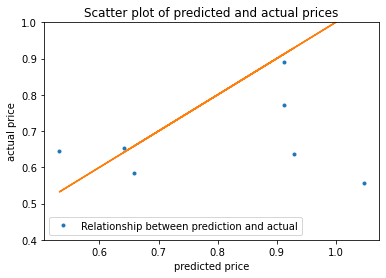

In [107]:
yy=np.linspace(0,1,len(y_pred))
for i in range(0,len(y_pred)):
    yy[i]=y_test.iloc[i]

plt.title('Scatter plot of predicted and actual prices')
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.plot(y_pred,yy,".",label='Relationship between prediction and actual')
plt.plot(y_pred,y_pred)
plt.ylim([0.4, 1.0])
plt.legend()

Need to do graphs in R not in python